In [1]:
from sklearn.datasets import make_circles, make_regression
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import tensor

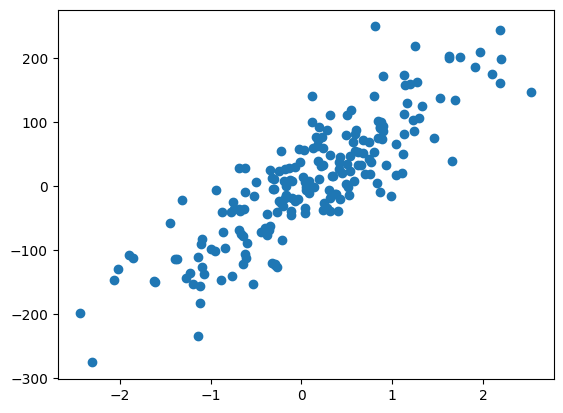

In [2]:
x, y = make_regression(n_samples=200, n_features=1, noise=50,random_state=1)

plt.scatter(x,y)
plt.show()

In [3]:
x=torch.tensor(x, dtype=torch.float32)
y=torch.tensor(y, dtype=torch.float32)

In [17]:
model = nn.Sequential(nn.Linear(1,1))

optimiser = torch.optim.SGD(model.parameters(),lr = 0.2)

loss = nn.L1Loss()

In [22]:
epochs=300

ss_total = torch.sum((y - y.mean())**2)

for epoch in range(epochs):

    res = model(x)

    ss_res = torch.sum((y.reshape(-1,1)-res)**2)

    train_loss=loss(res, y.reshape(-1,1))

    optimiser.zero_grad()

    train_loss.backward()

    optimiser.step()

    r_square = (1-(ss_res/ss_total))

    if epoch % 10 ==0:

        print(f"Epoch: {epoch} | Loss: {train_loss:.5f} | R_square: {r_square:.2f}")

for i,ii in model.named_parameters():

    print(i, ii)

Epoch: 0 | Loss: 39.18289 | R_square: 0.73
Epoch: 10 | Loss: 39.16364 | R_square: 0.73
Epoch: 20 | Loss: 39.15530 | R_square: 0.73
Epoch: 30 | Loss: 39.14872 | R_square: 0.73
Epoch: 40 | Loss: 39.14217 | R_square: 0.73
Epoch: 50 | Loss: 39.13656 | R_square: 0.73
Epoch: 60 | Loss: 39.13095 | R_square: 0.73
Epoch: 70 | Loss: 39.12535 | R_square: 0.73
Epoch: 80 | Loss: 39.11975 | R_square: 0.73
Epoch: 90 | Loss: 39.11579 | R_square: 0.73
Epoch: 100 | Loss: 39.11182 | R_square: 0.73
Epoch: 110 | Loss: 39.10786 | R_square: 0.73
Epoch: 120 | Loss: 39.10504 | R_square: 0.73
Epoch: 130 | Loss: 39.10290 | R_square: 0.73
Epoch: 140 | Loss: 39.10191 | R_square: 0.73
Epoch: 150 | Loss: 39.10130 | R_square: 0.73
Epoch: 160 | Loss: 39.10070 | R_square: 0.73
Epoch: 170 | Loss: 39.10009 | R_square: 0.73
Epoch: 180 | Loss: 39.09948 | R_square: 0.73
Epoch: 190 | Loss: 39.09887 | R_square: 0.73
Epoch: 200 | Loss: 39.09826 | R_square: 0.73
Epoch: 210 | Loss: 39.09766 | R_square: 0.73
Epoch: 220 | Loss: 39

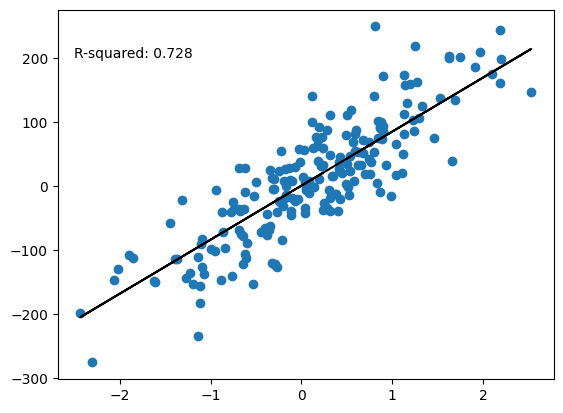

In [23]:
plt.scatter(x,y)
plt.plot(x, model(x).detach(),color='black')
plt.annotate((f"R-squared: {r_square:.3f}"), (-2.5, 200))
plt.show()